# Chapter: Object detection Datasets

## Topic-1: Brief introduction to datasets
  - Coco dataset
  - VOC dataset 
  - OpenImagesV4 dataset 
  
## Topic-2: Basic Analysis of Coco dataset using pycocotools 
  - total images present in the dataset.
  - total annotations present in the dataset
  - image information 
  - Annotation information
  - visualizing an image along with its annotations 
  - visualizing the masks of each object.

## Topic-3: Advanced analysis of coco dataset using pycocotools
  - instances of each object and its distribution
  - instances of objects in each image.

### Topic-1: Brief introduction to datasets

Most of the usecases in Deep learning is fueled by large scale datasets. Be it ImageNet dataset for image classification, COCO and Openimagesv4 dataset for object detection, COCO, ADE20k for segmentation or MegaFace dataset for face recognition, we have a large scale dataset for each and every topic. Over the last few years deep learning community have spent considerable resources in collecting, analysing and annotating these datasets as there was a direct correlation between the performance of deep learning models to the dataset. the larger the dataset, the larger the peformance. 

Object detection datasets require drawing bounding box on each and every required object. This is obviously very difficult compared to image classification annotation (assigning a label to the image). COCO has roughly more than ~0.12 million images annotated for across 80 objects. In 2016, Google introduced Open Images, a collaborative release of ~9 million images annotated with labels spanning thousands of object categories. Since then they have rolled out several updates, culminating with Open Images V4 in 2018. In total, that release included 15.4M bounding-boxes for 600 object categories, making it the largest existing dataset with object location annotations, as well as over 300k visual relationship annotations. 

Also if you are solving any image problem in you organization, the first and foremost thing we need to keep in mind is that we need to annotate large scale dataset. One way to get away with this in computer vision is finding network architecutures and pre-trained weights availability. This will help us in solving our problem by annotating less data than required. Now if we are considering object detection as a solution to your problem, we need to know what all datasets are available and later check if any research team has trained any models on these datasets and released pre-trained weights. This is the first fundamental research you as a data science practioner has to do. 

The Object detection community has various public datasets available. Some of the noted datasets are **VOC2007-2012**, **COCO** and **openimagesv4** datasets. These datasets comes in different scales and sizes with some datasets like VOC only has ~10000 images with annotations for 20 classes and openimagesv4 has annotations for ~1.5 million images across ~600 classes. Lets talk about each and every dataset individually now.

## 1.1 VOC Dataset
- The dataset first released in 2007 and updated over a period of time till 2012.
- The dataset now has 9993 images with annotations for segmentation and detection across 20 classes.

The object classes are broadly classified into 4 categories as seen below. 
- Person: person
- Animal: bird, cat, cow, dog, horse, sheep
- Vehicle: aeroplane, bicycle, boat, bus, car, motorbike, train
- Indoor: bottle, chair, dining table, potted plant, sofa, tv/monitor


img1       |  img2 |  img3 |  img4 |  img5
:---------:|:------:|:-----:|:-------:|:------:
![img1](../images/voc1.jpg)  |  ![](../images/voc2.jpg) | ![](../images/voc3.jpg) | ![](../images/voc4.jpg)| ![](../images/voc5.jpg)

- For more information, reach out to their official website [here](http://host.robots.ox.ac.uk/pascal/VOC/voc2012/#data) 

## 1.2 Coco Dataset 
- Common Objects in Context aka AKA is a large scale object detection, segmentation and captioning dataset. coco has several features.  
- The organization has also released a paper https://arxiv.org/pdf/1405.0312.pdf.
- There are two kind of categories.
    - stuff: includes materials and objects with no clear boundaries. Example: Sky, street, grass.
    - thing: objects for which individual instances can be easily labelled. Example: Person, car, cat etc.

The following are important features of the website 

| Object | Arguments |
| ----------------|------------| 
| Object segmentation annotation| pixel wise annotation for each object|
| Recongition in contex| The dataset is collected to make sure that objects are appeared in context in non-iconic (image not focussed on objects) ways.|
| Superpixel stuff segmentation| Annotation of stuff objects |
| 330k images > 200k labelled images| 1.5 million object instances were annotated in these images|
| categories | 80 object categories and 91 stuff categories were annotated |
| captions per image | There were around 5 captions per image |
| key point annotations | 250,000 key points of humans were annotated|

- Though we will not be using segmenation, captions and key point annotations in this course, It is good to understand the dataset well.
- We can download the images and annotations from [here](http://cocodataset.org/#download)
- The organization also released a python package called **pycocotools**, which we will use in this course to process the data efficently. All the dataloaders which appear in coco format use pycocotools as their base package and build utils tool on top of that (We will see this in later part of the course) . The github repo can be found [here](https://github.com/cocodataset/cocoapi/tree/master/PythonAPI)
- We can explore the dataset on the coco official website here by category wise [here](http://cocodataset.org/#explore). The following is the screen shot of images containing horse class.

![coco images](../images/cocoimage.png)

## 1.3 OpenImagesV4
- OpenImagesV4 is a contribution from Google.
- It has **15.4 million** bounding-boxes annotations across **600 categories** on **1.9 million** images.
- On Average, while VOC has 3 instances per image, COCO has 7.7 instances per image, Openimages has 8.4 instances per image.
- Read more about the dataset here- https://arxiv.org/pdf/1811.00982.pdf
- There are also 30,113,078 image-level labels on 19,794 categories.
- To download the dataset we can reach out here https://storage.googleapis.com/openimages/web/download.html
- We can visualize the images by category [here](https://storage.googleapis.com/openimages/web/visualizer/index.html?set=train&c=%2Fm%2F01s105). The following is the screenshot of the images which contain toothbrush category.

![OpenimagesV4](../images/openimagesv4.png)


# Quiz:

1) Which of the following dataset has maximum number of category objects annotated ?  
A) VOC  
B) COCO  
C) OpenimagesV4  
D) All the datasets has same number of category objects.  

Ans) C. Openimagesv4 has 600 categories 

2) In-terms of number of images annotated. Which of the following dataset has minimum number of images annotated?  
A) COCO  
B) Pascal VOC  
C) COCO and VOC has same number of images  
D) Openimagesv4  

Ans) B Pascal VOC has ~10k images, coco has ~0.12 million and openimages ~15.4 million images rougly

## Topic-2: Basic Analysis of Coco dataset using pycocotools 
Object detection and image segmentation datasets are complex. The datasets contain multiple images. Each image has one or more annotations with one to many labels. The objects are located in the image at different locations and come in different shapes and sizes. So we need to follow some structure in storing and retrieving this dataset. Pycocotools helps in retrieving/analyzing these dataset efficiently. 

We will use **COCO** function to understand how the annotated data is stored in the json files and how to process them efficiently to calculate different charateristics of the datasets.

The Pycocotools has two modules, 
- COCO: helps in analyzing the datasets. 
- COCOEval: helps in evaluating model outputs and calculate various metrics on cocodataset.

Of the three datasets, we will use **COCO dataset** for processing here for the following reasons.
- Scale is not too vast nor too small (~0.1 million annotated images in training data)
- Easily available pre-trained models for transfer learning.
- Diverse dataset.

In this topic, We will process coco dataset using pycocotools and derive various statistics which will help us in understanding the dataset better.  

Lets look at the annotation tools available

In [ ]:
import glob
input_files = glob.glob("../../datasets/annotations/instances_*.json")
input_files

we have **instances_train2017.json** and **instances_val2017.json** files available. Lets look at one of the files to understand how annotations are stored inside these json files.

pycocotools is a library used to process these json files efficently.

In [2]:
from pycocotools import coco
data = coco.COCO("../../datasets/annotations/instances_train2017.json") # loading the json file

loading annotations into memory...
Done (t=11.72s)
creating index...
index created!


**data** is a pycocotools object which contain various attributes. 
- dataset: the raw json file contents
- anns: A dict with each ann_id as key and image information in values
- cats: A dict with each cat_id as key and category information as values.
- imgs: A dict with each image_id as key and image information in values
- imgToAnns: A dict object which contains mapping from imageId to annotations
- catToImgs: A dict object which contains mapping from categories to image id. 

Any infromation in the json files can be captured using this information. Lets look at some of these and answer a few questions.

#### Q1) How many images are present in the dataset?
- There are 118287 images in the dataset.

In [3]:
print("Total images:", len(data.imgs.keys()))

Total images: 118287


#### Q2) How many object annotations are there in the dataset?
- There are 860001 annotations in the datasets

In [4]:
print("Total images:", len(data.anns.keys()))

Total images: 860001


#### Q3) What information do we have about the image?  
Each image_id contains the following information
- license: data.dataset["license"] has the information on where this dataset is collected. 3 represent the key number to access the license here.
- file_name: name of the image. used to read the image.
- coco_url: the url of the image to download if there is any problem with your local copy. Also helpul when you want to play with the dataset and download a handfull of images (like we do below)
- height: height of the image 
- width: width of the image
- date_captured: Time when this image is captured. (Not very useful for our excerise).
- filckr_url: url from which these images are downloaded.
- id: the id of the image. useful to map with anntotations

In [5]:
image_id = list(data.imgs.keys())[0]
print("image_id: {}".format(image_id))
data.imgs[image_id]

image_id: 391895


{'license': 3,
 'file_name': '000000391895.jpg',
 'coco_url': 'http://images.cocodataset.org/train2017/000000391895.jpg',
 'height': 360,
 'width': 640,
 'date_captured': '2013-11-14 11:18:45',
 'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg',
 'id': 391895}

#### Q4) What information do we have about an Annotation?
- It is a dictionary with the following keys
  - segmentation: RLE format of the segmentation mask of the annotation
  - area: area occupied by the object in the image
  - iscrowd: 
  - image_id: image to which it belongs too.
  - bbox: the [x, y, w, h] location of the image.
  - category_id: category to which it belongs too.
  - id: id of the annotation.

In [6]:
ann_id = list(data.anns.keys())[0]
print("annation_id: {}".format(ann_id))
data.anns[ann_id]

annation_id: 156


{'segmentation': [[239.97,
   260.24,
   222.04,
   270.49,
   199.84,
   253.41,
   213.5,
   227.79,
   259.62,
   200.46,
   274.13,
   202.17,
   277.55,
   210.71,
   249.37,
   253.41,
   237.41,
   264.51,
   242.54,
   261.95,
   228.87,
   271.34]],
 'area': 2765.1486500000005,
 'iscrowd': 0,
 'image_id': 558840,
 'bbox': [199.84, 200.46, 77.71, 70.88],
 'category_id': 58,
 'id': 156}

Q5) For a given image_id lets visualize the images with its bounding box on it .
  - we have getAnnIds method to get the ann_ids
  - loadAnns method to load the annotation
  - loadImgs takes image_id and gives the image information. Lets us download the image from the coco_url and draw the bounding boxes on the image to understand how the data looks.

In [7]:
print("image_id: {}".format(image_id))
ann_ids = data.getAnnIds(imgIds= image_id)
print("total annotations: {}".format(len(ann_ids)))
ann_ids

image_id: 391895
total annotations: 4


[151091, 202758, 1260346, 1766676]

In [8]:
target = data.loadAnns(ann_ids)
print("Total annotation on the image: {}".format(len(target)))

Total annotation on the image: 4


In [9]:
img_info = data.loadImgs(image_id)[0]
img_info

{'license': 3,
 'file_name': '000000391895.jpg',
 'coco_url': 'http://images.cocodataset.org/train2017/000000391895.jpg',
 'height': 360,
 'width': 640,
 'date_captured': '2013-11-14 11:18:45',
 'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg',
 'id': 391895}

- Download the image from the internet incase if you don't have the data access.

In [10]:
import urllib.request
save_loc = "../../datasets/"
img = urllib.request.urlretrieve(img_info["coco_url"], save_loc+img_info["file_name"])

- lets visualize the image now 

In [11]:
## import necessary packages 
from PIL import Image
import numpy as np 

from utils import draw_grid, plot_images # to draw bounding boxes and plot the images efficently.

In [12]:
boxes = np.asarray([i["bbox"] for i in target])
label = np.asarray([i["category_id"] for i in target])
label_name = [data.cats[i]["name"] for i in label]

image= Image.open(save_loc+img_info["file_name"])
image_with_grid= draw_grid(image.copy(), boxes, label_name, outline="red", input_format="xywh")

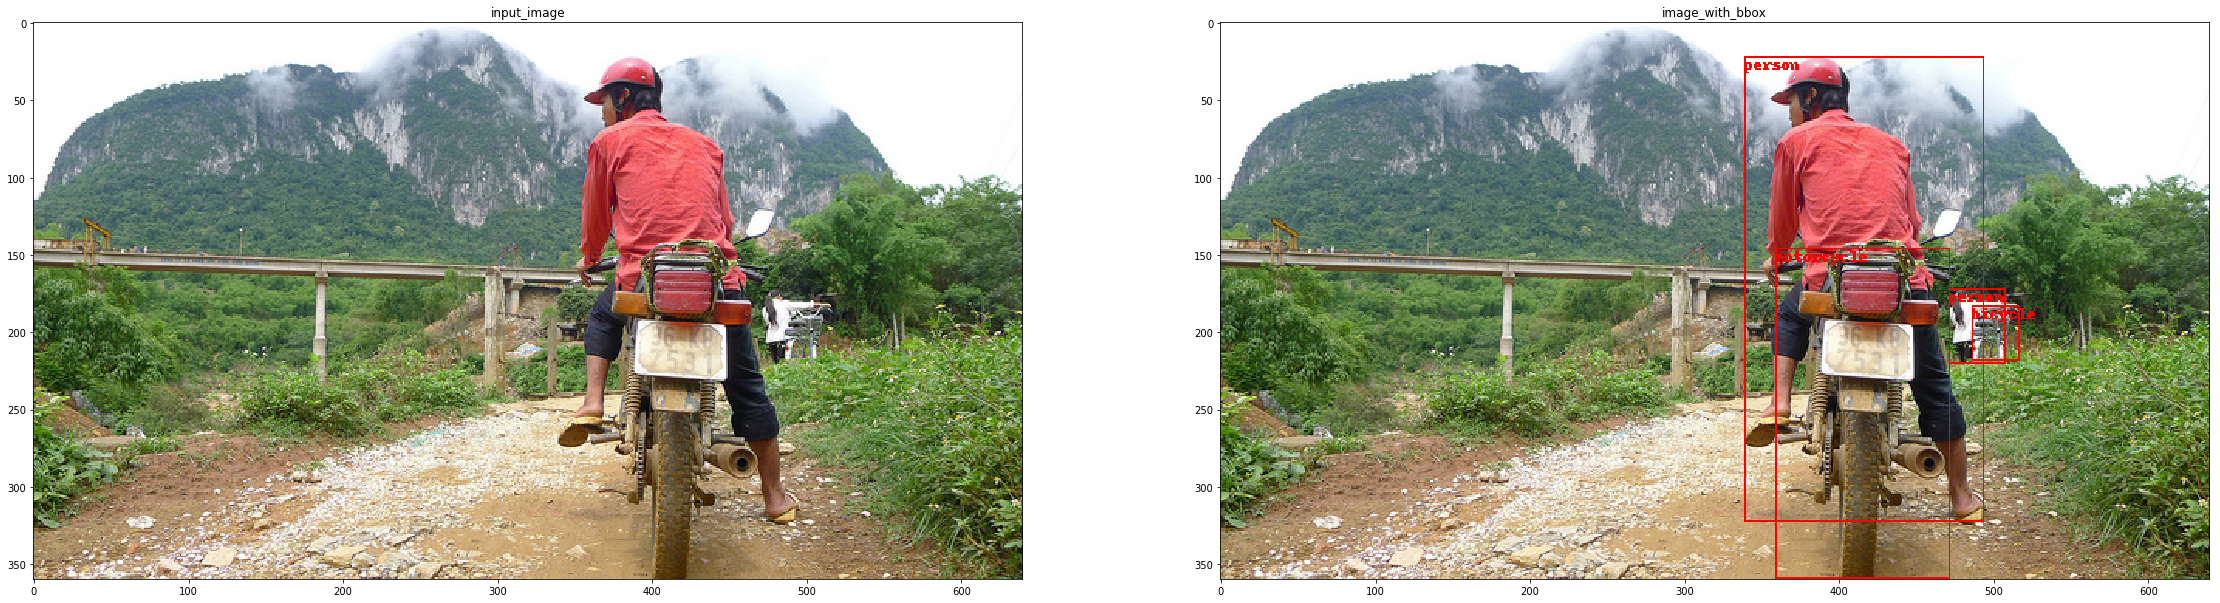

In [13]:
plot_images([image, image_with_grid], 
           ["input_image", "image_with_bbox"])

- In the above image we can clearly see that there are two persons, one motocycle and another bicycle.

Though we will be not using the mask information in this course. Lets quickly visualize and see how objects are described.
  - annToMask method will convert RLE format to mask.

In [18]:
masks = [data.annToMask(i)  for i in target]
## Convert masks to PIL image
pil_masks = [Image.fromarray(i*255) for i in masks]

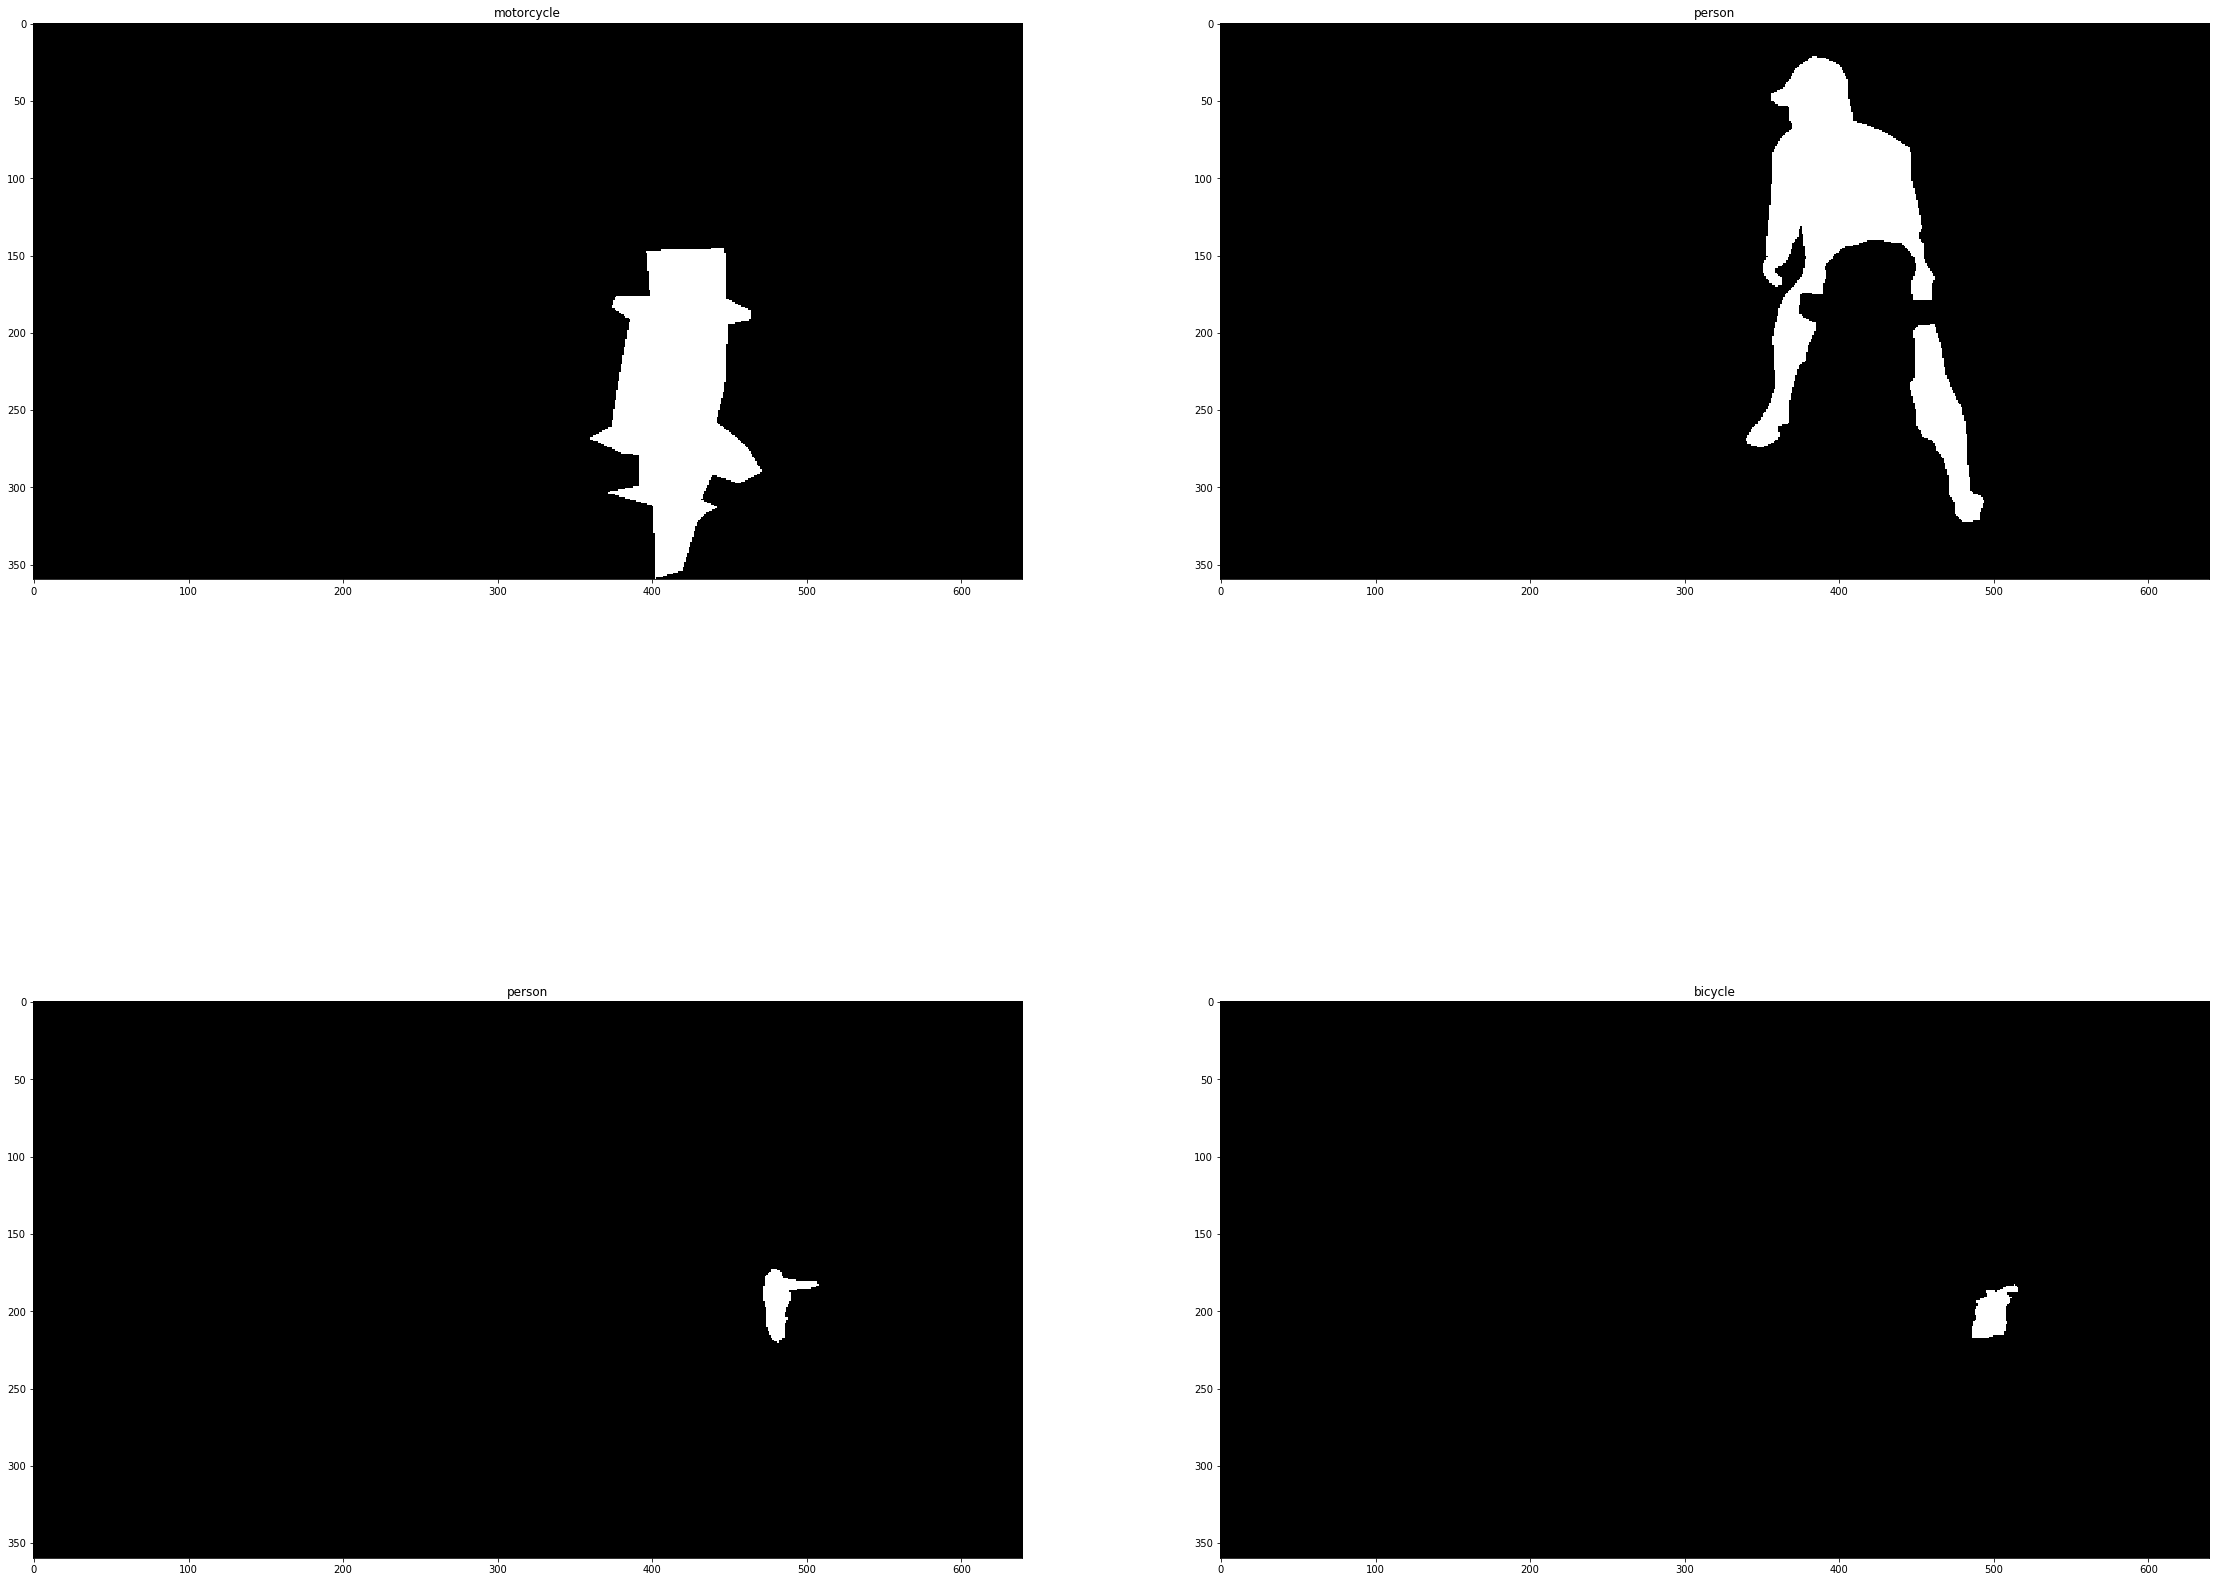

In [19]:
plot_images(pil_masks, label_name)

- In practice this dataset is annotated in the following way
  - A mask is generated for each object in the image and a tightly fit bounding box is generated from each mask.
  - these are verified by multiple annotators.
  - To understand fully about the dataset read this paper: https://arxiv.org/pdf/1405.0312.pdf
  
  
## Quiz 
Q1) How many objects does image_id = 559665 Contains?  
1) 2  
2) 6  
3) 16 (Ans)  
4) 12  

solution:
```python
ann_ids = data.getAnnIds(imgIds= 559665)
```

Q2) What is the height and width of image_id = 559665?  
1) height = 794, width = 940  
2) width = 940, height = 794  
3) width = 640, height= 397  (Ans)
4) height = 640, width = 397 

```python
height = data.imgs[559665]["height"]
width = data.imgs[559665]["width"]
```

## Topic: Advanced analysis of coco dataset using pycocotools
There are several image stats which we can calculate to understand the dataset better and we wil do them as and when required but there are two fundamental stats which are important to understand
- Instances of each object and how are they distributed
- How many objects per image are present?

These two stats will give an idea on how imbalanced/balanced are the datasets. This section also helps in understanding how to process these annotation file for calculating some complex metrics about the dataset. In the later sections we will understand how they will help us in desigining the pipeline. 

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

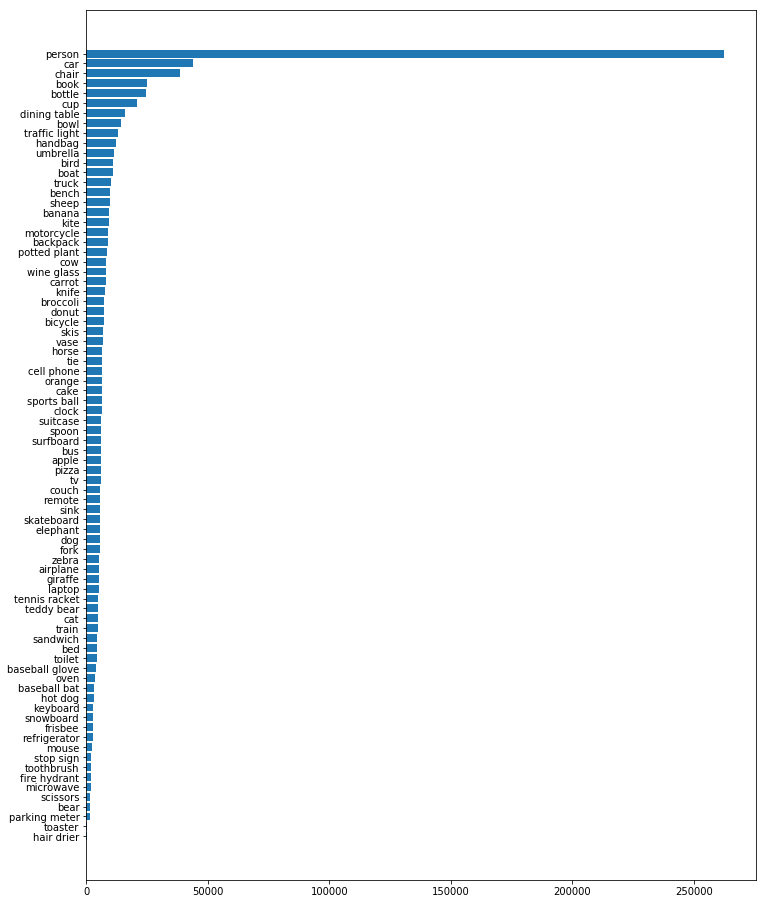

In [33]:
## Instances of each object 
labels = [] # list of label names 
label_instances = [] # the number of instances of each label 

for i in data.cats.keys():
    labels.append(data.cats[i]["name"])
    label_instances.append(len(data.getAnnIds(catIds=[i])))

xy = [(j, i) for i, j in sorted(zip(label_instances, labels))]
x = [i[0] for i in xy]
y = [i[1] for i in xy]

plt.figure(figsize=(12, 16))
plt.barh(x, y)
plt.show()

## How many objects are present inside the image ?

mean number of objects per image: 7.27046082832433
median number of objects per image: 4.0


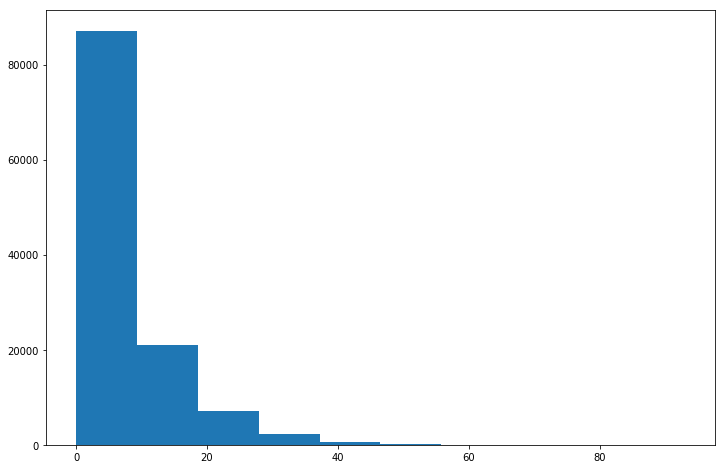

In [34]:
image_ids = data.imgs.keys()
anns_per_image = [len(data.getAnnIds(imgIds=[i])) for i in image_ids]
print("mean number of objects per image: {}".format(np.mean(anns_per_image)))
print("median number of objects per image: {}".format(np.median(anns_per_image)))

plt.figure(figsize=(12, 8))
plt.hist(anns_per_image)
plt.show()

- In both the cases we find that there is a heavy class imbalance. 
  - people instances are highly represented compared to other classes.
  - 50% of the images contains less than or equal to 4 objects. 

In [41]:
small = 0
medium = 0
large = 0
for i in data.anns.keys():
    anns = data.anns[i]
    area = anns["area"]
    if area <= 1024:
        small += 1 
    elif area > 1024 and area <= 9216:
        medium += 1 
    else:
        large += 1
print(small, medium, large)

356343 295160 208498


## Task

1) How many objects are of small size, medium size and large size?
  - In coco small objects are in the range of [0, 1024], medium objects are in the range of (1024, 9216] and large objects are in the range of (9216, Inf]
  
Instructions:
each annotation in the data.anns dictionary has an area field. below is one of the annotation dictionary

```
{'segmentation': -
 'area': 1545.4213000000007,
 'iscrowd': 0,
 'image_id': 200365,
 'bbox': [234.22, 317.11, 149.39, 38.55],
 'category_id': 58,
 'id': 509}
```

Ans) 
small objects = 356343  
medium objects = 295160  
large objects = 208498  
 
Solution
```python
small = 0
medium = 0
large = 0
for i in data.anns.keys():
    anns = data.anns[i]
    area = anns["area"]
    if area <= 1024:
        small += 1 
    elif area > 1024 and area <= 9216:
        medium += 1 
    else:
        large += 1
print(small, medium, large)
# 356343 295160 208498
```

# The End